**Pertemuan 5, Praktikum 3**

Nama  : Gilang Purnomo

NIM : 2341720042

No  : 14

# **Langkah 0 - Import Library**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **Langkah 1 - Load Data Citra**
Kita akan mencoba menggunakan 1 data citra dari dataset yang telah disediakan

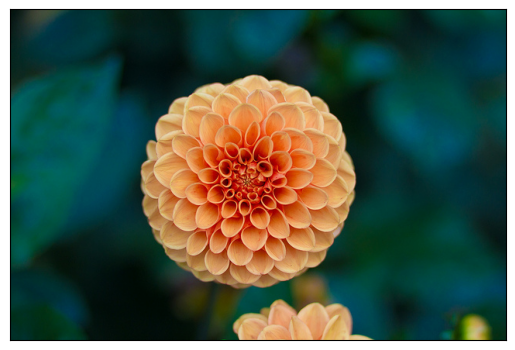

In [ ]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower)

# **Langkah 2 - Preprocessing**
Selanjutnya kita akan melakukan pengecekan ukuran citra dan normalisasi warna

In [ ]:
# Check shape
print(flower.shape)

# Normalize color
data = flower / 255.0

# Reshape
data = data.reshape(427 * 640, 3) # turn to 1D

print(data.shape)

(427, 640, 3)
(273280, 3)


# **Langkah 3 - Cek Sebaran Warna**
Buat fungsi berikut,

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

Panggil fungsi untuk mengetahui sebaran warna,

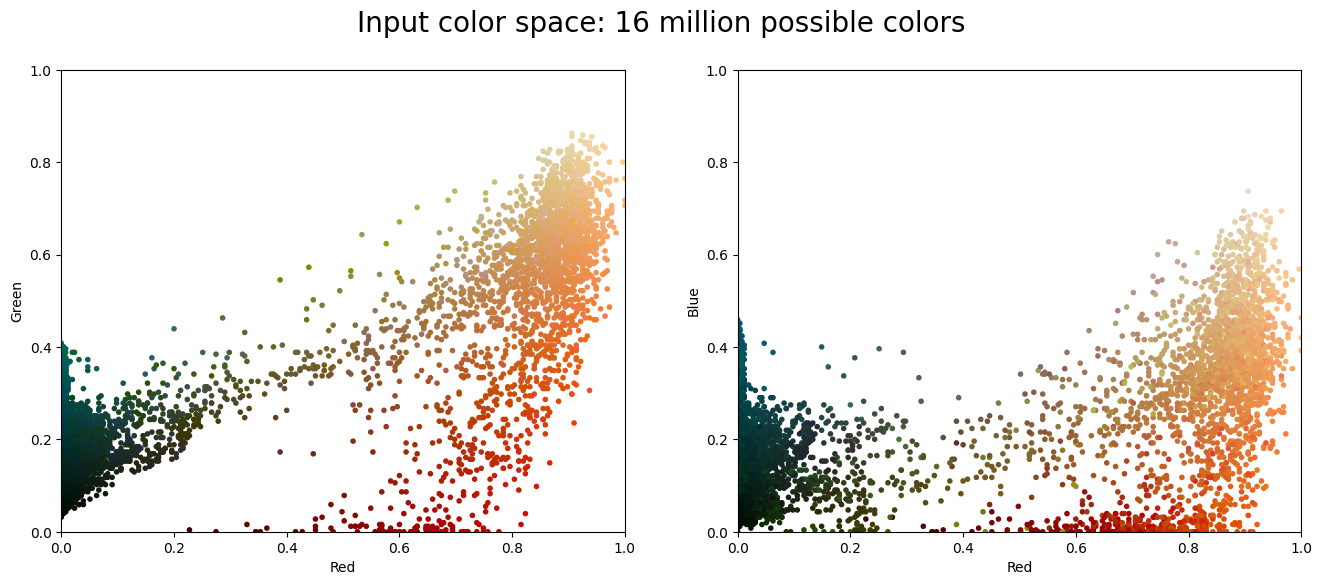

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

# **Langkah 4 - Klasterisasi Warna**
Pada tahap ini kita akan melakukan klasterisasi hanya dengan 16 warna saja.

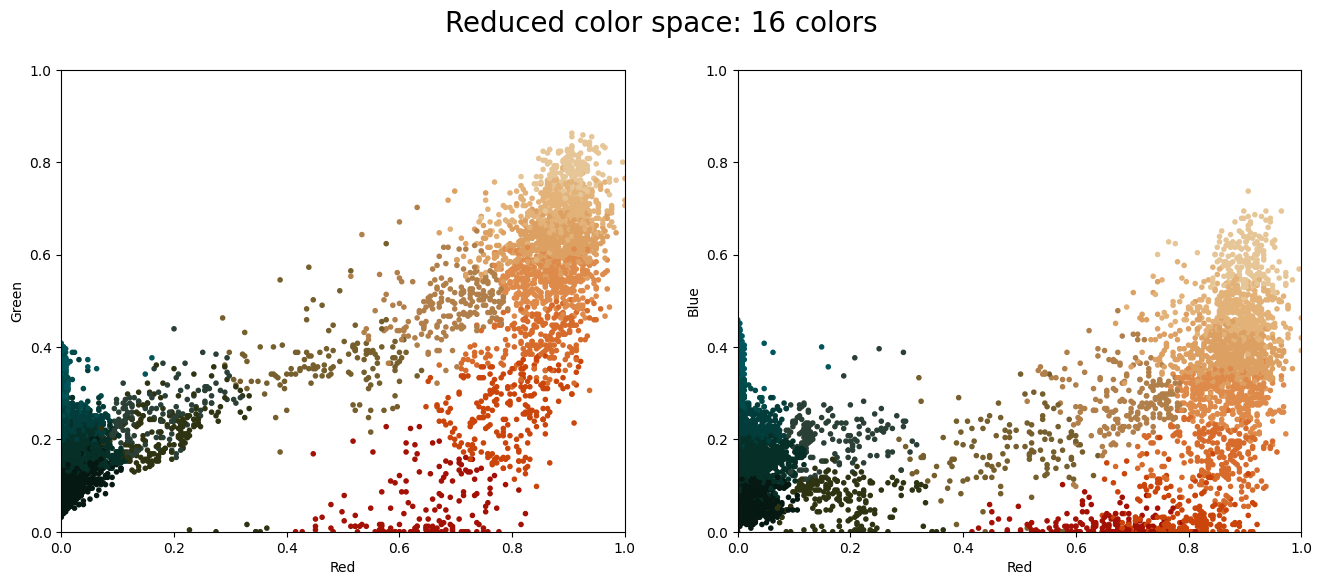

In [ ]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

Hasil perbandingan warna citra sebelum dan setelah kompresi adalah sebagai berikut,

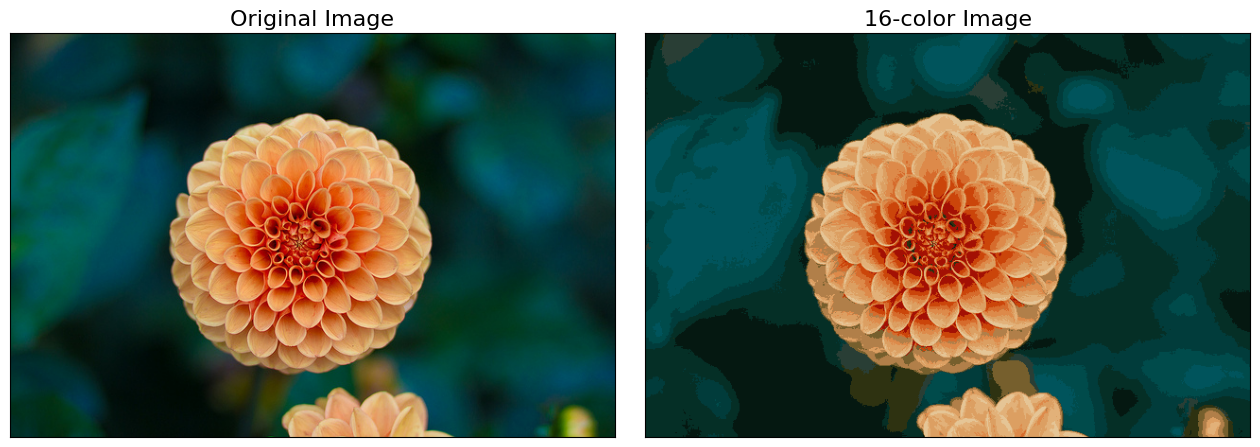

In [ ]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);